In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data = pd.concat([train, test]).drop(['index'], axis=1)

In [3]:
print(f"trian : {train.shape}")
print(f"test : {test.shape}")
print(f"concat : {data.shape}")

trian : (26457, 20)
test : (10000, 19)
concat : (36457, 19)


In [4]:
continuous_var = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'adult_family_ratio', 'income_total']
binary_var = ['car', 'email', 'gender', 'pthone','reality', 'work_phone']
multilabel_var = ['edu_type', 'family_type', 'house_type', 'income_type', 'occyp_type']

In [5]:
# 모든 사람은 핸드폰을 가지고 있다.
data = data.drop(['FLAG_MOBIL'], axis=1)

# 음수들 양수로 변환 변환
data['DAYS_BIRTH'] = -data['DAYS_BIRTH']
data['DAYS_EMPLOYED'] = -data['DAYS_EMPLOYED']
data['begin_month'] = -data['begin_month']

# DAYS_EMPLOYED : 일하고 있지 않은 사람들 0으로
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].apply(lambda x : x if x >=0 else 0)

In [86]:
# NULL 값이 있는지 확인 
data.isnull().sum()

DAYS_BIRTH           0
DAYS_EMPLOYED        0
begin_month          0
car                  0
child_num            0
credit           10000
edu_type             0
email                0
family_size          0
family_type          0
gender               0
house_type           0
income_total         0
income_type          0
occyp_type       11323
phone                0
reality              0
work_phone           0
dtype: int64

In [6]:
data['adult'] = data['family_size'] - data['child_num']
adult_family_ratio = []
for i, x in data.iterrows():
    if x.adult > 0:
        adult_family_ratio.append(x.family_size / x.adult)
    else:
        adult_family_ratio.append(5)
data['adult_family_ratio'] = adult_family_ratio
data['adult_family_ratio'] = data['adult_family_ratio'].apply(lambda x: x if x<=4 else 5)

data = data.drop(['family_size', 'child_num', 'adult'], axis = 1)

In [ ]:
data[data['occyp_type'].isna()].credit.value_counts(normalize=True)

In [ ]:
data[data['occyp_type']=='noJob'].credit.value_counts(normalize=True)

<AxesSubplot:>

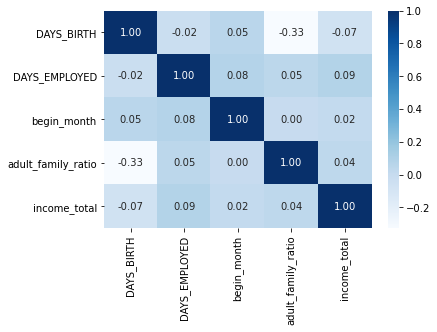

In [88]:
# 연속형 변수 간 상관계수
plt.rcParams['figure.figsize'] = [6, 4]
sns.heatmap(data = data[continuous_var].corr(),annot=True, fmt = '.2f',cmap='Blues')

<AxesSubplot:xlabel='adult_family_ratio', ylabel='income_total'>

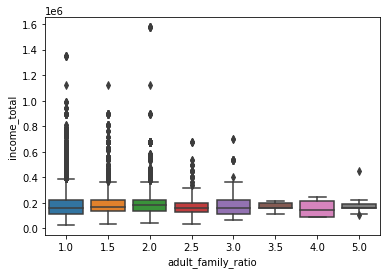

In [93]:
# adult_family_ratio와 income_total의 음의 상관계수가 눈에 띔
sns.boxplot(y = data.income_total, x = data.adult_family_ratio)

In [103]:
continuous_var = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month','adult_family_ratio', 'income_total']
binary_var = ['car', 'email', 'gender', 'phone','reality', 'work_phone']
multilabel_var = ['edu_type', 'family_type', 'house_type', 'income_type', 'occyp_type']

2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: credit, dtype: float64


<AxesSubplot:xlabel='credit', ylabel='count'>

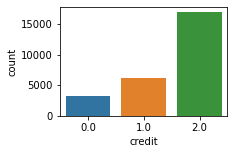

In [95]:
# credit의 분포
plt.rcParams['figure.figsize'] = [3,2]
print(data["credit"].value_counts(normalize=True))
sns.countplot("credit", data= data)

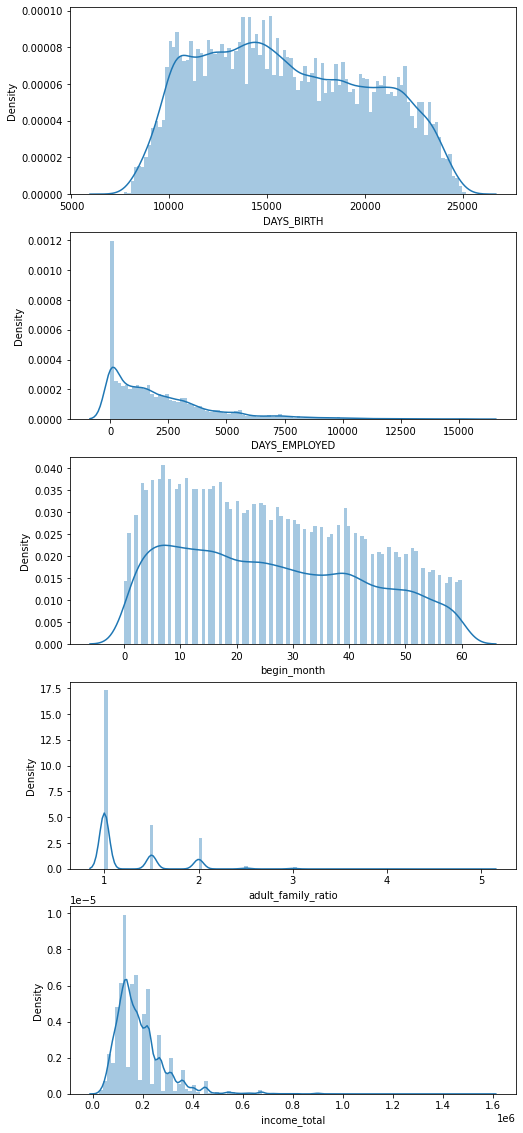

In [99]:
# 연속형 변수들 분포
plt.rcParams['figure.figsize'] = [8, 20]
fig, ax = plt.subplots(len(continuous_var))
for i, c in enumerate(continuous_var):
    sns.distplot(data[c], ax = ax[i], bins=100 )

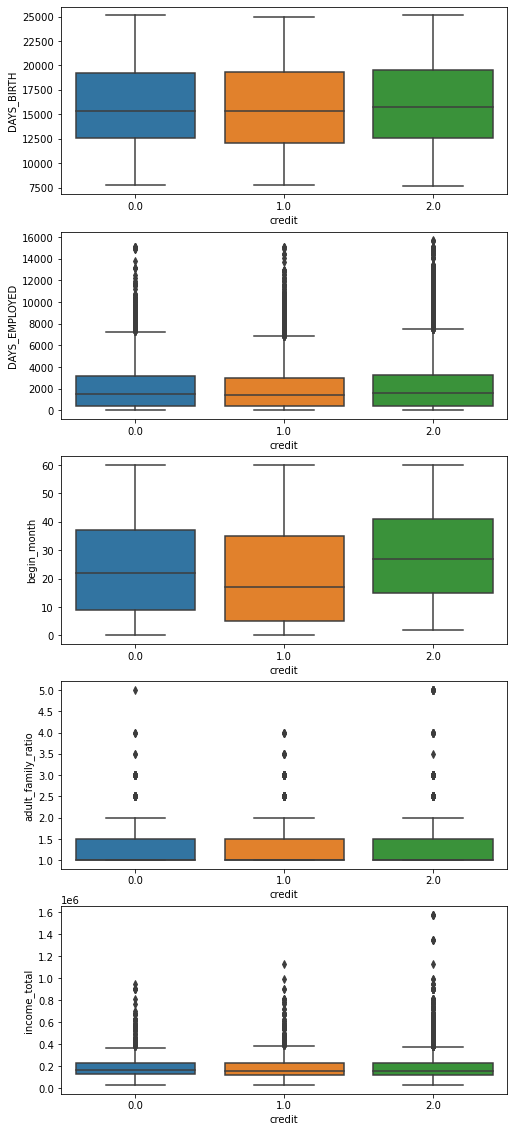

In [101]:
# Box-Plot
plt.rcParams['figure.figsize'] = [8, 20]
fig, ax = plt.subplots(len(continuous_var))
for i, c in enumerate(continuous_var):
    sns.boxplot(y= data[c], x= data["credit"], ax = ax[i])

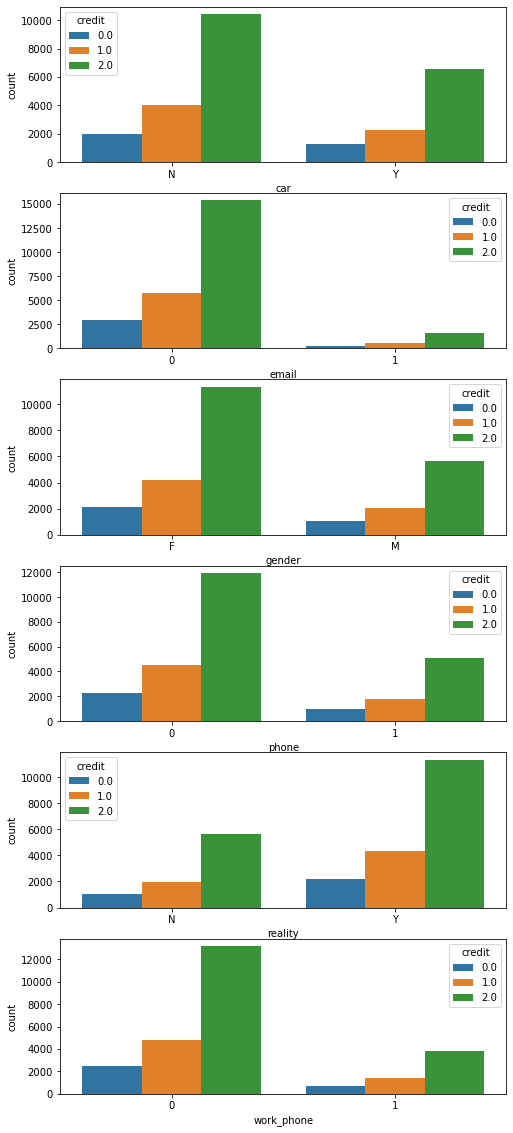

In [104]:
# binary
fig, ax = plt.subplots(len(binary_var))
for i, c in enumerate(binary_var):
    sns.countplot(x=c, data=data, ax = ax[i], hue="credit" )

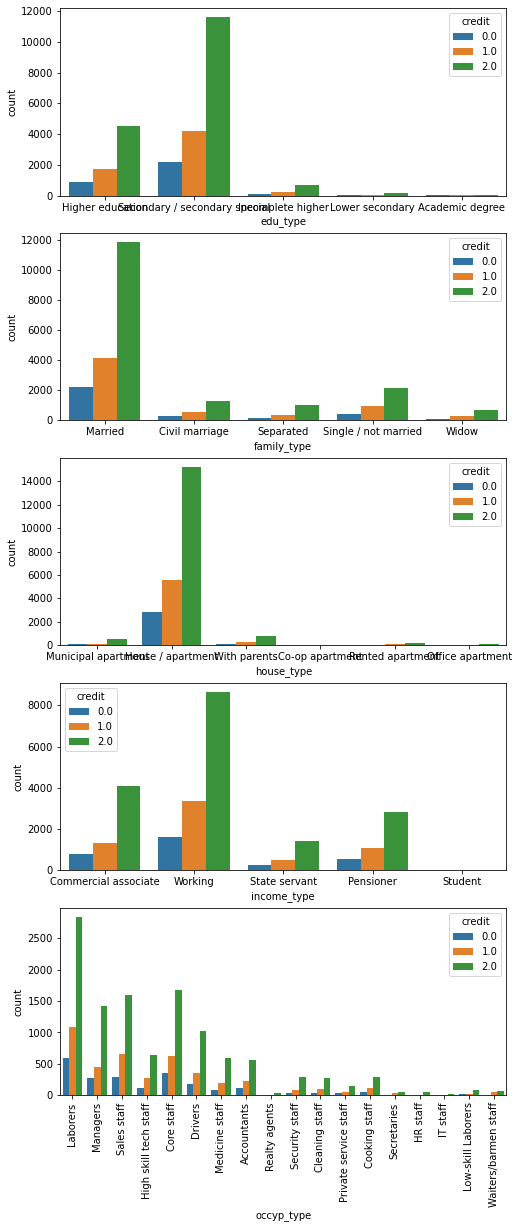

In [110]:
# multilabel_var
fig, ax = plt.subplots(len(multilabel_var))
for i, c in enumerate(multilabel_var):
    plt.xticks(rotation='vertical')
    sns.countplot(x=c, data=data, ax = ax[i], hue="credit")

In [9]:
def family_type_toBinary(x):
    if x in ['High Education']
    

data.edu_type

0                    Higher education
1       Secondary / secondary special
2                    Higher education
3       Secondary / secondary special
4                    Higher education
                    ...              
9995                Incomplete higher
9996    Secondary / secondary special
9997    Secondary / secondary special
9998    Secondary / secondary special
9999                 Higher education
Name: edu_type, Length: 36457, dtype: object